# Final Project - Loans Dataset

Welcome to the final step on the Exploratory Data Analysis (EDA) module. Congratulations! This is the final project!


## Instructions

The objective of this project is to explore and solve problems on a Loans Dataset (`final_project_lending.csv`). This dataset contains information about credit applicants. Banks use this kind of datasets to create models to help on deciding on who to accept/refuse for a loan. Generally, after cleaning and organizing the dataset, the patterns of a good / bad applicant are learned by machine learning models.

Explore, test, evaluate, think, be sceptic! This is Data Science!


## Details on the dataset

The Target (Label) name is `bad_loan`, where $1$ means the observation is a default (person that ended up not paying the loan), and $0$ means the observation is a non-default (person that ended up paying the loan).

All the other features are characteristics of the applicant. 


## Delivery of Project

This jupyter notebook is to be delivered to evaluate your knowledge on the Exploratory Data Analysis module at Rumos, **before the FINAL DATE (end of day 16-02-2025)** agreed with the professor. Please add your name and e-mail next.

**Student Name**: "NAME_HERE"  
**E-mail**: "EMAIL_HERE"


## Plagiarism

Always remember that you are here to learn. Discussions on the final project are highly incentivised but please do not share your work. The struggle to solve the problems is needed in order to become a true Data Scientist. By allowing others to use your code you are making the world a worse place: you are not truly helping your colleague, and you are not promoting discussions on the topic.

In case you need help, or just want to discuss some project-related topics, reach out to me either through email or through a Slack direct message.

In [105]:
# NOTE: You can import any library you might find useful besides the following ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches

In [106]:
# RUN this cell: load the dataset (do NOT delete this cell)
data = pd.read_csv('final_project_lending.csv', low_memory=False)

# Objectives

Please solve the following exercises by creating a markdown cell with **# EXERCISE >>NUMBER<<**  just before you solve it (you can use the number of cells you need after that).

1. Take a **quick look** at your dataset. If you could say something about it in two sentences, what would it be?

2. **Data Visualization**. *A picture is worth a thousand words.* Do not forget all the tips made on the Data Visualization class! Visualize the data as much as needed to truly understand the data. You should, at the least do the following (but do visualize more than these, as that knowledge will help you on the next tasks):

    2.1. Pick two numerical variables. Create a **scatter plot**. Describe what you see.  
    2.2. Create a **bar plot** from the data that you think is relevant. Explain.  
    2.3. Create a beautiful **heatmap**. Remember what are they useful to show (correlations...)?  
    2.4. Create a **distribution plot** with a feature broken down by target. Don't forget to add some alpha.  
    2.5. (Optional, but incentivized) Create an additional **insightful plot**. Describe the insight.  

3. Fully characterize, in term of **descriptive statistics**, the variables `id`, `annual_inc` and `grade`. -> revise these.

4. Correlation.

    4.1. What are the two most correlated numerical features (Spearman) - absolute number?  
    4.2. What is the numerical feature most correlated with the target (Pearson)?  

5. Are there any **outliers**? If there are, solve them. **Justify** all detected outliers, and **justify** the method you chose to eliminate. 

6. Deal with the **missing values**, along with anomalies. Detect and eliminate them. Remember: not all missing values are represented by a `np.nan`.

7. **Feature Selection**. Select at least two numerical features to drop. Justify the method(s) you used, and why you chose those variables. (Note: you can drop more variables, either categorical or numerical.)

8. **Pipelines** (scikit-learn). Load the dataset again and **select only the numerical variables**.

    8.1. Create a pipeline with three steps: (1) [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) with `strategy=’median’`; (2) One Scaler you may know; (3) [Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (with final 5 features)  
    8.2. Fit and Transform your dataset.  
    8.3. Comment what you obtained.  

9. Create a new Pipeline with, **at least, one Transformer created by you**. This Transformer should help on solving one of the issues the dataset has such as for example, outliers, dropping columns based on any particular characteristic, encoding, etc. Then, fit and transform the dataset. NOTE: you can choose to work only with **numerical** or **categorical** variables to ease your work.


## Evaluation
Points (of a total of 100%):
1. 5%  
2. 20%  
3. 10%  
4. 10%  
5. 10%  
6. 10%  
7. 10%  
8. 10% 
9. 5%

Final 10% for additional effort and conclusions beyond what was asked (give your _extra mile_).

## Important notes
1. Data Science is all about *flow*. Keep your analysis work-flow consistent.  
2. When it is requested you to *describe* something, please be 1. sceptic, 2. objective, and 3. succinct! 
3. If you don't know: search, invent, study, but please don't leave any exercise blank.

### Good luck!
# 3, 2, 1, GO! GO! GO!

---

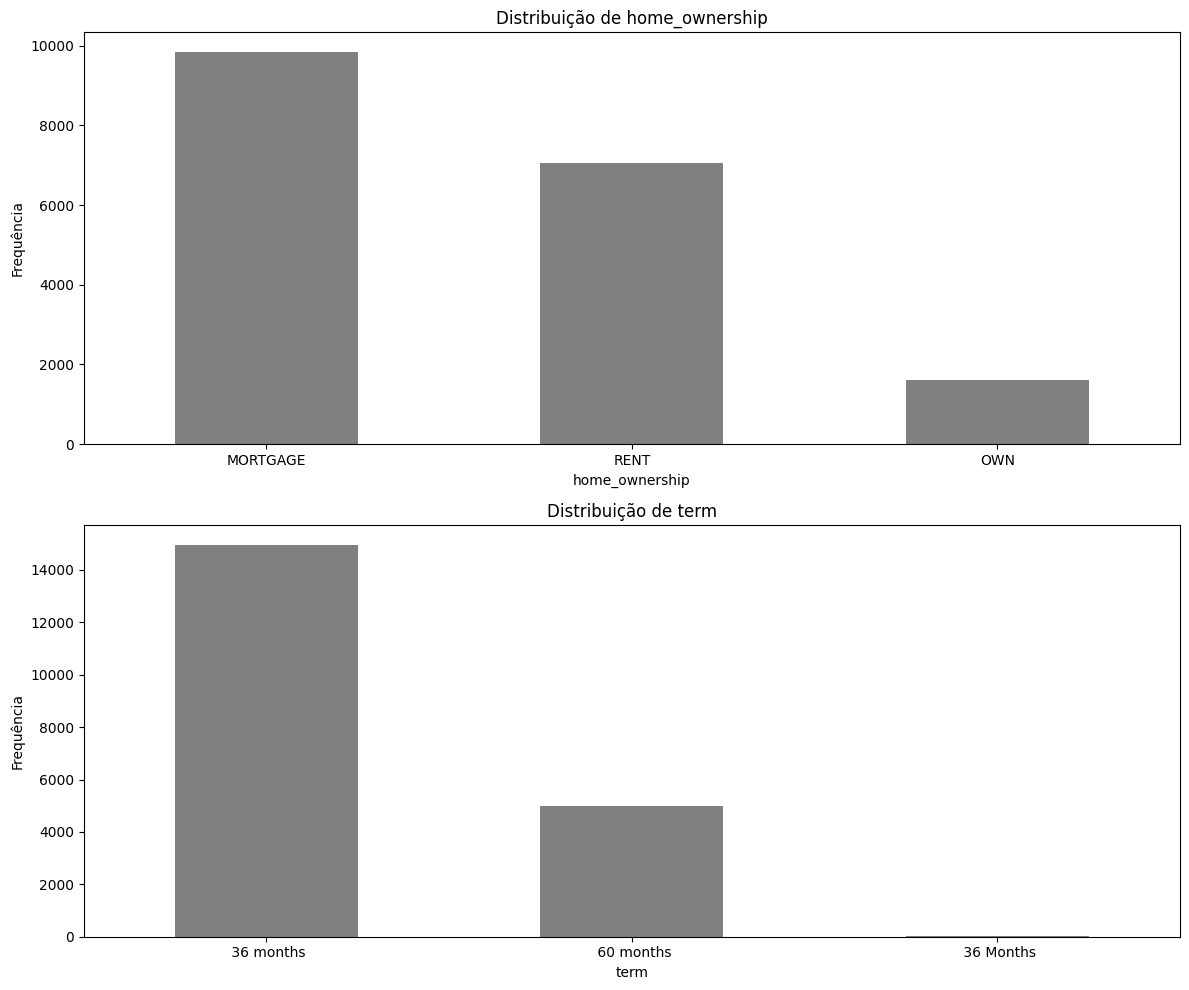

In [107]:
# Contagem das variáveis categóricas
categorical_columns = ['home_ownership', 'term']
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

for ax, col in zip(axes.flatten(), categorical_columns):
    data[col].value_counts().plot(kind='bar', ax=ax,color='gray')
    ax.set_title(f'Distribuição de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequência')
    ax.tick_params(axis='x', rotation=0) 
    
plt.tight_layout()
plt.show()

In [108]:
data['term'].unique()

array([' 36 months', ' 60 months', ' 36 Months'], dtype=object)

---

# EXERCISE 1

---

Obter as dimensões do DataFrame e apresentar o número de linhas (observações) e colunas (variáveis)

In [109]:
data.shape

(20000, 15)

 Obter algumas estatísticas descritivas do DataFrame

In [110]:
data.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


Consultar tipos de dados das variaveis como também contagem de valore não nulos.

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

Apresentar aleatóriamente 10 registos para analisar formato de dados. 

In [112]:
data.sample(10)

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
941,10404980,D,63000.0,0,11,MORTGAGE,13.49,debt_consolidation,60 months,0,0.0,71.5,0.0,0.271513,0
1713,10764851,D,98000.0,0,8,MORTGAGE,17.76,debt_consolidation,36 months,1,NaN,73.9,0.0,0.710918,0
10926,8979871,C,116188.0,0,11,MORTGAGE,16.84,debt_consolidation,60 months,1,1.0,35.5,0.0,0.065480,0
5144,7440193,B,40000.0,1,1,MORTGAGE,19.20,credit_card,36 months,0,NaN,16.0,0.0,0.261237,0
18472,6444963,D,65000.0,0,11,RENT,23.04,debt_consolidation,36 months,0,NaN,57.8,0.0,0.559003,0
19719,6553027,B,58764.0,1,0,MORTGAGE,23.61,debt_consolidation,60 months,0,NaN,41.4,0.0,0.229076,0
9409,8656704,B,65000.0,1,1,RENT,8.48,debt_consolidation,36 months,1,NaN,74.9,0.0,0.911366,0
12983,5610386,C,40000.0,0,4,RENT,18.57,debt_consolidation,60 months,1,NaN,62.3,0.0,0.522131,1
5310,7456083,C,33000.0,0,3,MORTGAGE,32.04,credit_card,36 months,0,NaN,69.9,0.0,0.704480,0
573,7659364,B,52000.0,0,11,MORTGAGE,12.83,debt_consolidation,36 months,0,NaN,15.0,0.0,0.745123,0


Apresentar nº de valore nulos por variavel

In [113]:
data.isnull().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

Calcular proporção de empréstimos que entraram em incumprimento (bad_loan equal to 1)

In [114]:
bad_loan_percentage = (data['bad_loan'].sum() / len(data)) * 100
print(f"Percentagem de empréstimos que entraram em incumprimento: {bad_loan_percentage:.2f}%")

Percentagem de empréstimos que entraram em incumprimento: 20.00%


O conjunto de dados contém informações sobre empréstimos de crédito, é constituido por 20 mil registos e 15 variáveis, incluindo variáveis numéricas e categóricas. Algumas variáveis apresentam valores em falta, destacando-se "home_ownership" e "last_major_derog_none". A taxa de incumprimento dos créditos (Target) pode ser observada através da coluna "bad_loan", onde se verifica que 20% dos processos de crédito resultaram em incumprimento. A variável "revol_util" (uso de crédito rotativo) apresenta um valor máximo anormal de 5010, possivelmente um erro, uma vez que representa a taxa de utilização da linha de crédito rotativo.


# EXERCISE 2

---

### EXERCISE 2.1

---

O código abaixo utiliza a função `pairplot` da biblioteca `seaborn` para criar um gráfico de dispersão entre todas as combinações de variáveis numéricas do conjunto de dados `data`. Para uma análise geral e identificação de possiveis padrões.

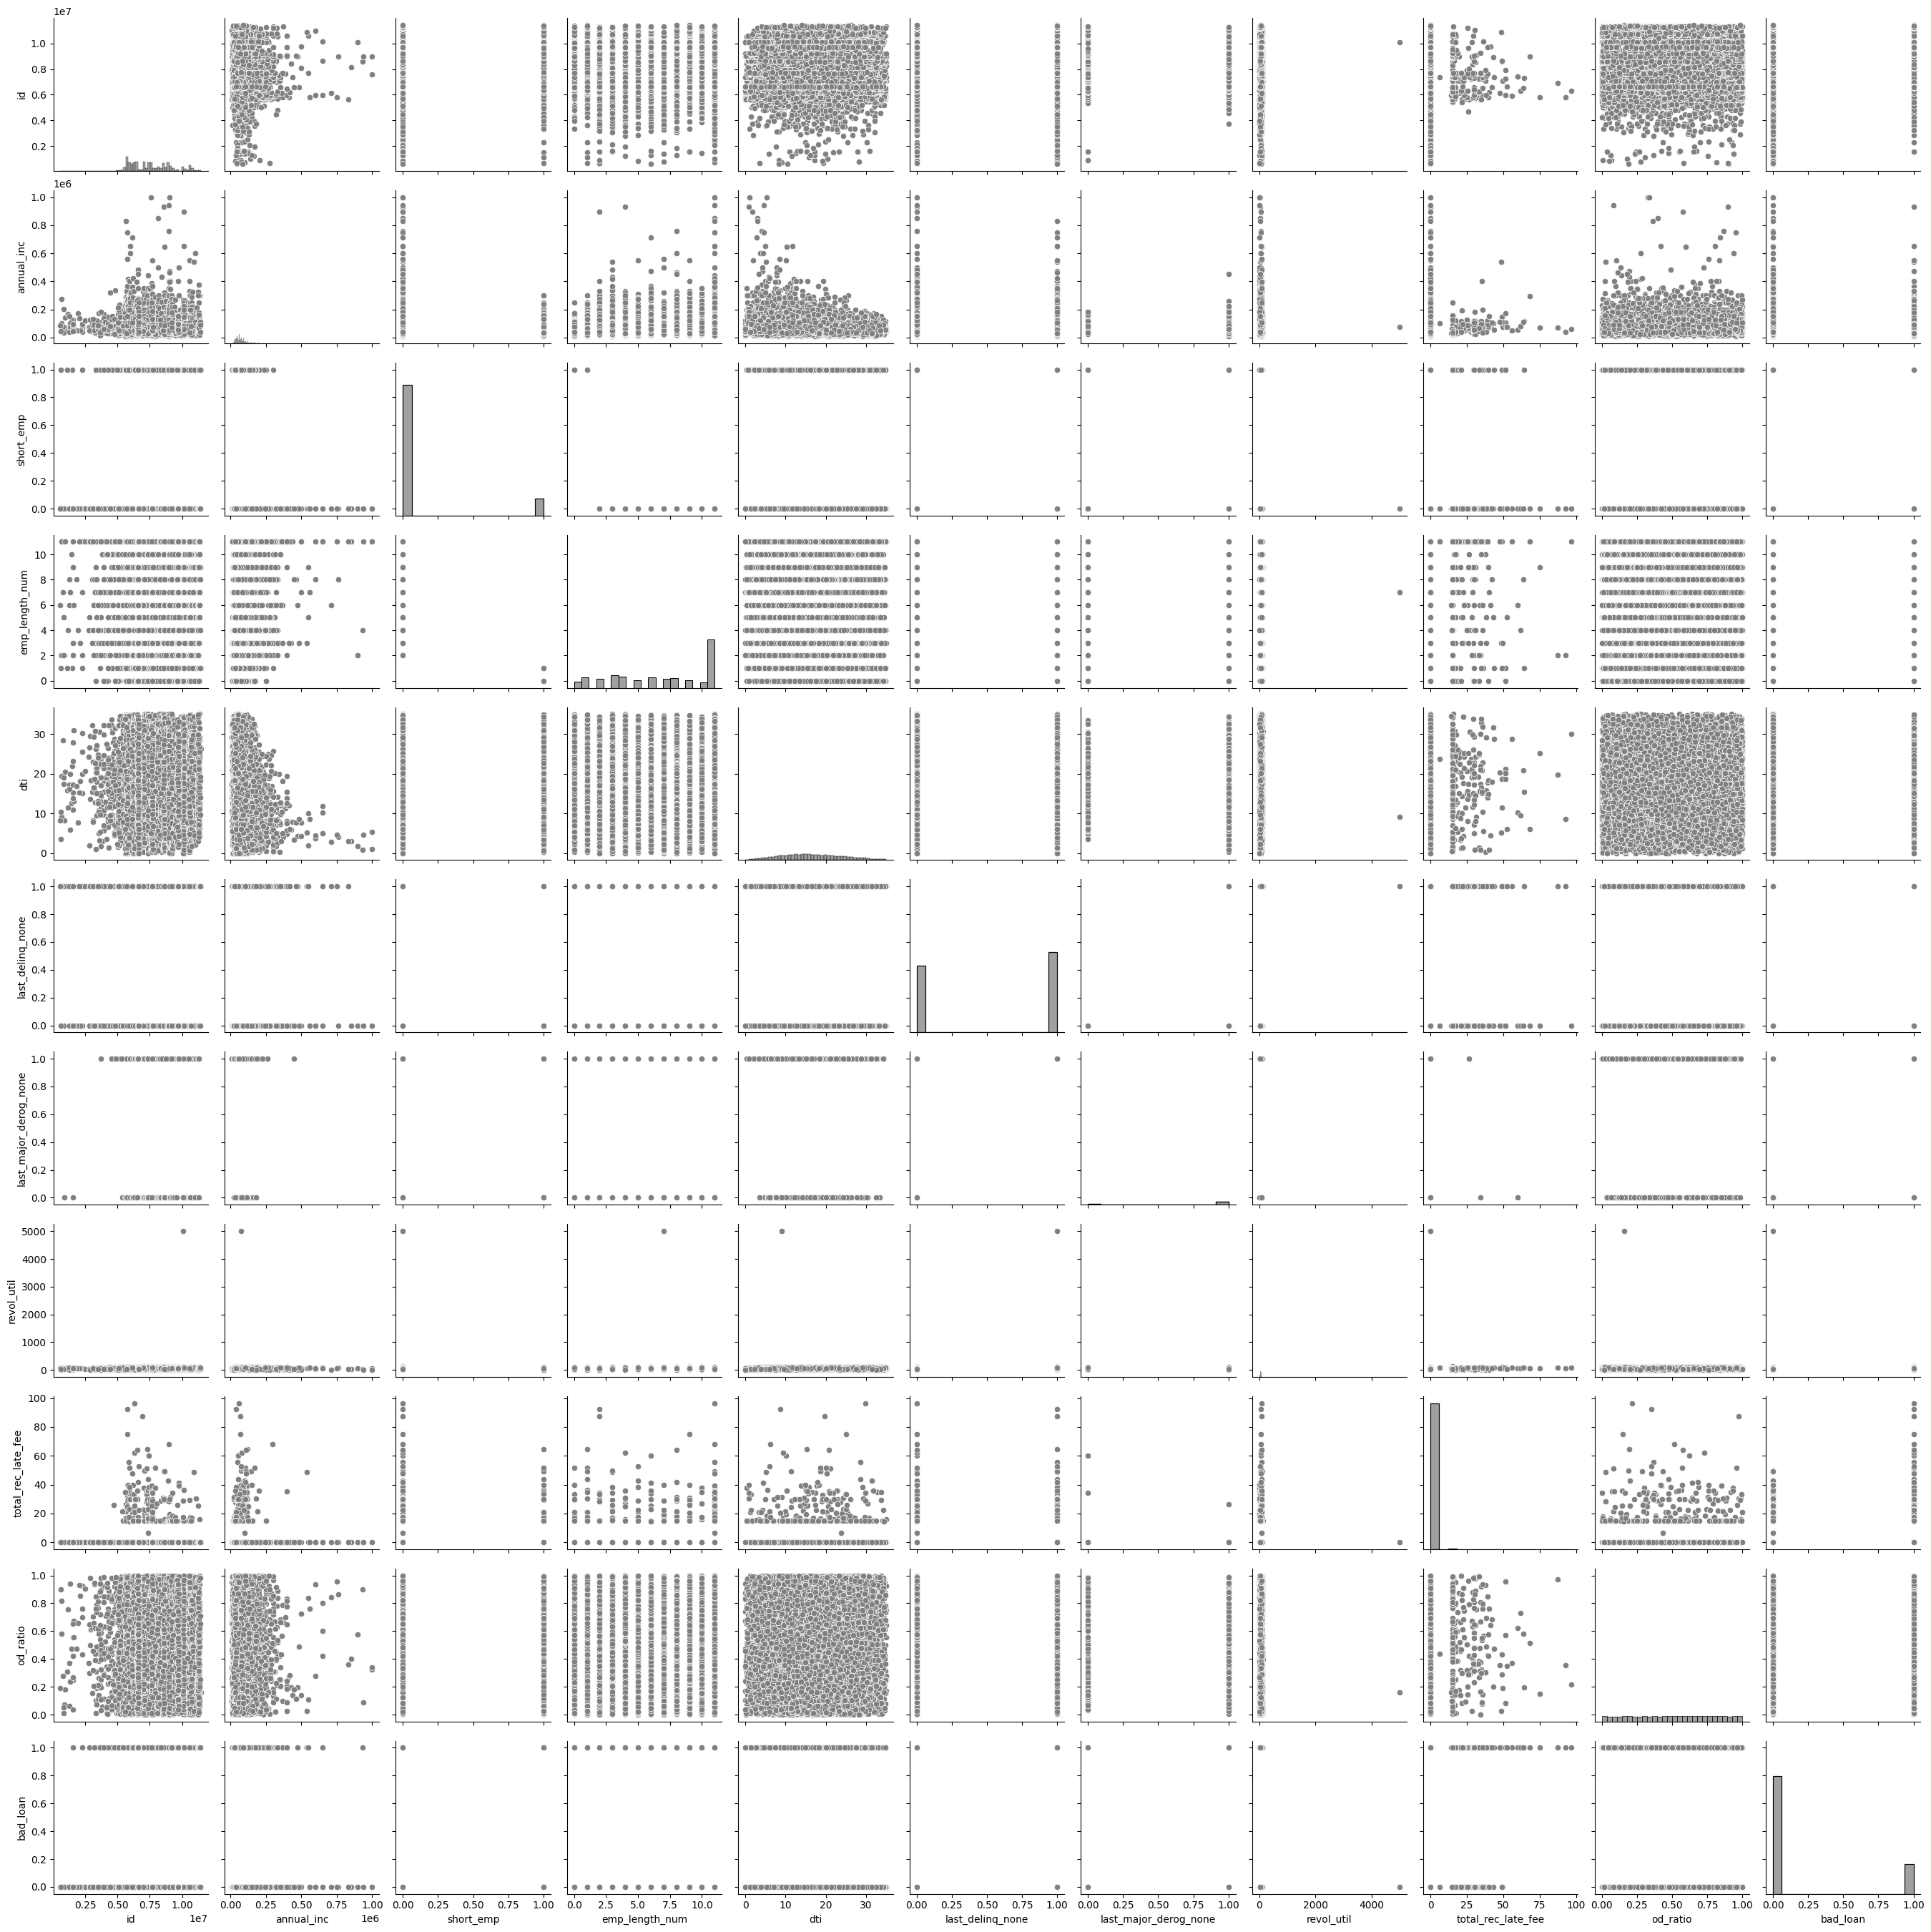

In [115]:
sns.pairplot(data, plot_kws={'color': 'gray'}, diag_kws={'color': 'gray'})
plt.show()

Construção de Gráfico de Dispersão entre Rendimento Anual e Rácio Dívida/Rendimento.

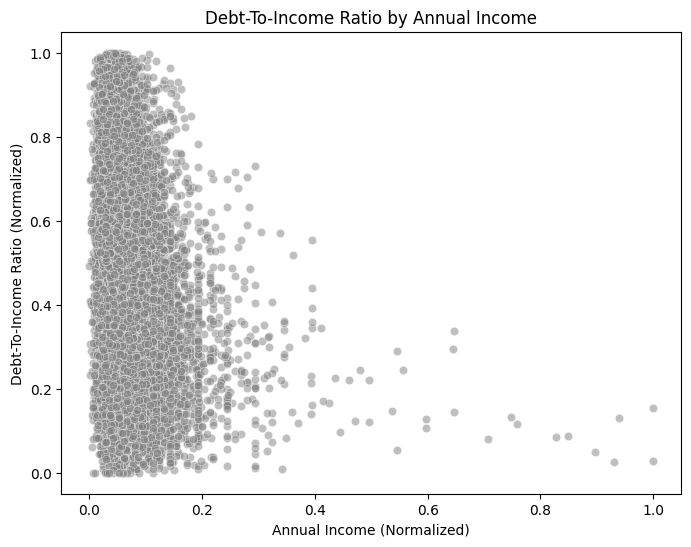

In [116]:
# Definir as variáveis de interesse
selected_vars = ["annual_inc", "dti"]

# Aplicar Min-Max Scaling para normalização das variaveis em novo dataframe
scaler = MinMaxScaler()
df_scaled = data.copy()
df_scaled[selected_vars] = scaler.fit_transform(data[selected_vars])

# Criar scatterplot com variáveis normalizadas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["annual_inc"], y=df_scaled["dti"], alpha=0.5, color='gray')
plt.xlabel("Annual Income (Normalized)")
plt.ylabel("Debt-To-Income Ratio (Normalized)")
plt.title("Debt-To-Income Ratio by Annual Income")
plt.show()

O gráfico de dispersão entre rendimento anual (annual_inc) e rácio dívida/rendimento (dti) ilustra a relação entre o rácio de endividamento/ rendimento e o rendimento dos indivíduos analisados. Apesar da dispersão dos dados, observa-se um padrão geral: à medida que o rendimento anual aumenta, o DTI tende a diminuir, o que sugere que, em média, indivíduos com rendimentos mais elevados possuem uma menor proporção de dívida face aos seus rendimentos.

No entanto, existem casos de indivíduos com rendimentos mais elevados que apresentam um DTI superior a outros com rendimentos inferiores. Isto indica que um rendimento mais alto não implica necessariamente um menor risco de crédito, uma vez que alguns indivíduos têm  elevados níveis de endividamento, independentemente dos seus ganhos. Assim, a variável Rendimento Anual, por si só, pode não ser suficiente para prever  o risco de incumprimento de um empréstimo, sendo necessário considerar outras variaveis com a DTI para uma avaliação mais completa.

### EXERCISE 2.2

---

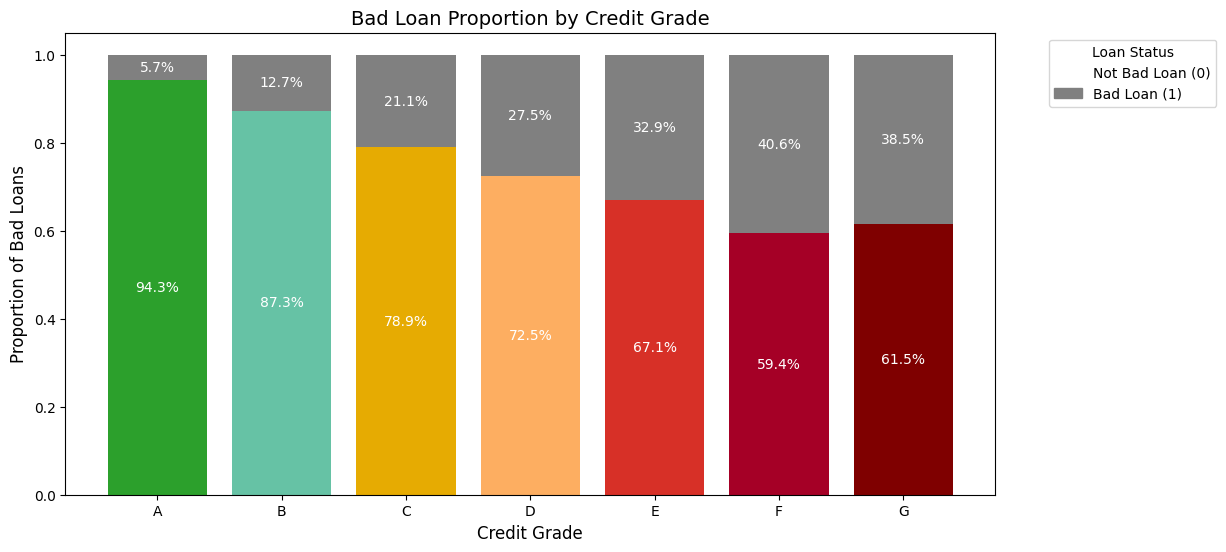

In [149]:
# Criar Tabela Pivot para calcular a proporção de empréstimos em incumprimento por grade
df_pivot_grade_loanstatus = data.groupby('grade')['bad_loan'].value_counts(normalize=True).unstack()

# Definir a ordem correta das grades e garantir que todas estejam presentes
grades_ordered = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df_pivot_grade_loanstatus = df_pivot_grade_loanstatus.reindex(grades_ordered)

# Definir cores da paleta verde → vermelho para as grades
grade_colors = {
    "A": "#2ca02c",  # Verde (baixo risco) #2ca02c
    "B": "#66c2a5",  # Verde claro
    "C": "#e6ab02",  # Amarelo
    "D": "#fdae61",  # Laranja
    "E": "#d73027",  # Vermelho
    "F": "#a50026",  # Vermelho escuro
    "G": "#7f0000"   # Vermelho mais intenso
}

colors = [grade_colors[grade] for grade in grades_ordered]
plt.figure(figsize=(12, 6))
plt.bar(grades_ordered, df_pivot_grade_loanstatus.iloc[:, 0], label='Not Bad Loan (0)', color=colors)
plt.bar(grades_ordered, df_pivot_grade_loanstatus.iloc[:, 1], 
        bottom=df_pivot_grade_loanstatus.iloc[:, 0], 
        label='Bad Loan (1)', color='grey')

# Adicionar valores dentro das barras
for i, grade in enumerate(grades_ordered):
    # Valor do segmento "Não Incumprimento"
    plt.text(i, df_pivot_grade_loanstatus.iloc[i, 0] / 2, 
             f"{df_pivot_grade_loanstatus.iloc[i, 0]:.1%}", 
             ha='center', va='center', color='white', fontsize=10)
    # Valor do segmento "Incumprimento"
    plt.text(i, df_pivot_grade_loanstatus.iloc[i, 0] + df_pivot_grade_loanstatus.iloc[i, 1] / 2, 
             f"{df_pivot_grade_loanstatus.iloc[i, 1]:.1%}", 
             ha='center',va='center', color='white', fontsize=10)

# Adicionar rótulos e título
plt.title('Bad Loan Proportion by Credit Grade', fontsize=14)
plt.xlabel('Credit Grade', fontsize=12)
plt.ylabel('Proportion of Bad Loans', fontsize=12)

# Criar legendas personalizadas
nao_incumprimento_patch = mpatches.Patch(color='white', label='Not Bad Loan (0)')
incumprimento_patch = mpatches.Patch(color='grey', label='Bad Loan (1)')

# Adicionar a legenda ao gráfico
plt.legend(handles=[nao_incumprimento_patch, incumprimento_patch], title='Loan Status', bbox_to_anchor=(1.05, 1))
plt.show()

O gráfico apresenta a proporção de empréstimos em incumprimento e em cumprimento para diferentes classificações de risco de crédito, que variam de A (menor risco) a G (maior risco). Observa-se um padrão claro: à medida que a classificação piora (de A para G), a percentagem de incumprimento aumenta. Clientes com classificações A e B apresentam uma taxa de incumprimento mais baixa, enquanto categorias como D a G registam um aumento significativo na percentagem de incumprimento, refletindo um risco de crédito mais elevado. Este padrão sugere que o sistema de classificação de crédito corresponde aos níveis de incumprimento observados.

A utilização de uma escala de cores do verde (A) ao vermelho (G) facilita a visualização da relação entre risco e incumprimento, permitindo identificar rapidamente as categorias de maior e menor risco.

### EXERCISE 2.3

In [118]:
#Calculate the Pearson correlation
corr_pearson = data.corr(method='pearson',numeric_only=True)
#Calculate the Spearman correlation
corr_spearman = data.corr(method='spearman',numeric_only=True)

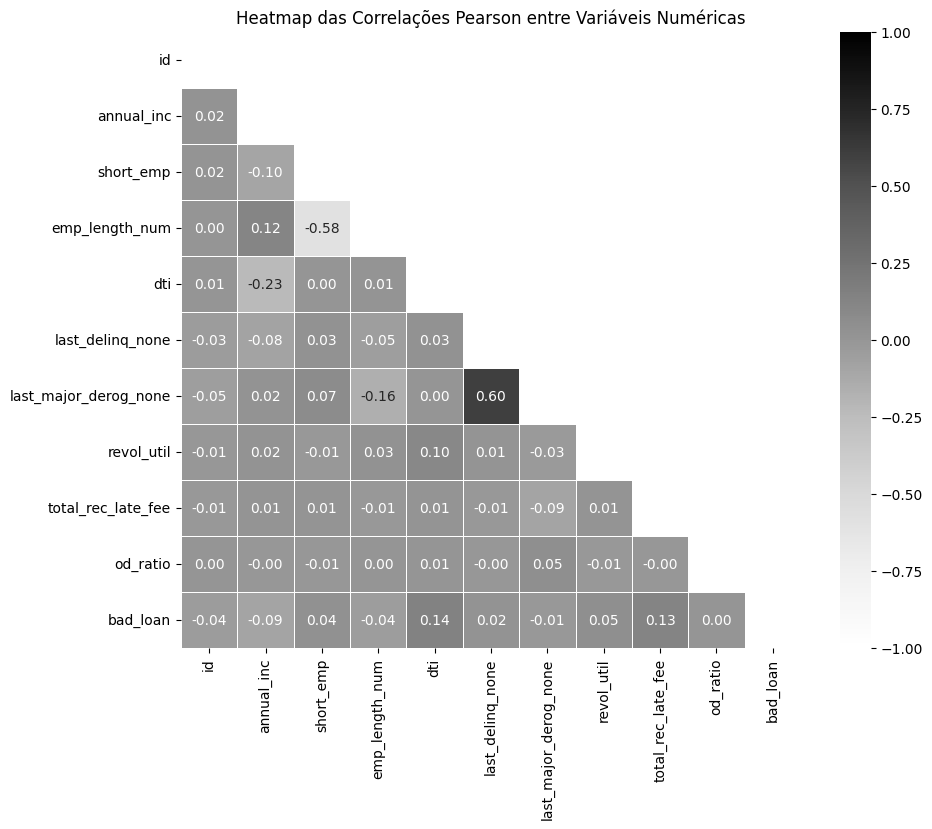

In [119]:
# Criar um heatmap Person das correlações entre variáveis numéricas
mask = np.triu(np.ones_like(corr_pearson))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap="Greys", fmt=".2f", linewidths=0.5,mask=mask,vmin=-1,vmax=1,)

# Configurar título
plt.title("Heatmap das Correlações Pearson entre Variáveis Numéricas", color="black")

# Exibir o gráfico
plt.show()


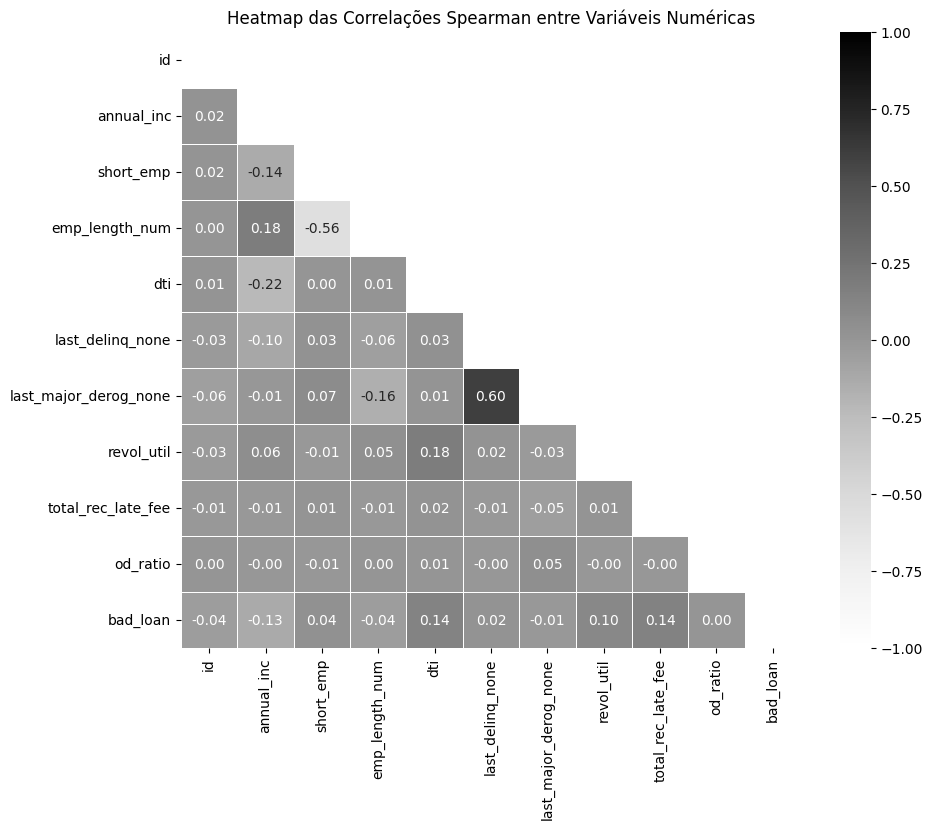

In [120]:
# Criar um heatmap Spearmn das correlações entre variáveis numéricas
mask = np.triu(np.ones_like(corr_spearman))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap="Greys", fmt=".2f", linewidths=0.5,mask=mask,vmin=-1,vmax=1,)

# Configurar título
plt.title("Heatmap das Correlações Spearman entre Variáveis Numéricas", color="black")

# Exibir o gráfico
plt.show()


O heatmap acima apresenta as correlações entre variáveis numéricas, utilizando tons de cinzento para facilitar a visualização das relações mais fortes, onde as cores mais escuras indicam correlações mais elevadas e as mais claras representam correlações mais fracas. Observa-se uma correlação significativa entre last_delinq_none e last_major_derog_none (0,60), o que sugere que quem já teve uma delinquência recente tem maior probabilidade de ter registado uma classificação de risco grave com 90 ou mais dias de atraso.

Além disso, verifica-se uma correlação negativa entre annual_inc e dti (-0,23), indicando que, quanto maior o rendimento, menor o peso da dívida sobre este, o que sugere que pessoas com rendimentos mais elevados tendem a apresentar um nível de endividamento inferior. Para ambos os valores de correlação referidos, foram calculados os respetivos valores-p, obtendo-se valores próximos de zero, o que confirma que a correlação é estatisticamente significativa.

In [121]:
def calc_correlation(data, var1, var2):
    """
    Calcula a correlação de Pearson e Spearman entre duas variáveis,
    removendo valores nulos antes do cálculo.
    
    Parâmetros:
    - data: DataFrame dados
    - var1: Nome da primeira variável
    - var2: Nome da segunda variável
    
    Retorna:
    - dicionário contendo os valores das correlações e p-values
    """
    # Remover valores nulos
    df_clean_corr = data.dropna(subset=[var1, var2])
    
    # Calcular a correlação de Pearson
    pearson_corr, pearson_p = scipy.stats.pearsonr(df_clean_corr[var1], df_clean_corr[var2])
    
    # Calcular a correlação de Spearman
    spearman_corr, spearman_p = scipy.stats.spearmanr(df_clean_corr[var1], df_clean_corr[var2])
    
    # Retornar os resultados
    return {
        "pearson_corr": pearson_corr,
        "pearson_p_value": pearson_p,
        "spearman_corr": spearman_corr,
        "spearman_p_value": spearman_p
    }


In [122]:
data.columns

Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
       'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'bad_loan'],
      dtype='object')

Calcular a correlação entre variavies 'last_delinq_none', 'last_major_derog_none'

In [123]:

result_corr = calc_correlation(data, 'last_delinq_none', 'last_major_derog_none')
print(result_corr)

{'pearson_corr': np.float64(0.6032673979655274), 'pearson_p_value': np.float64(3.494069707607259e-58), 'spearman_corr': np.float64(0.6032673979655275), 'spearman_p_value': np.float64(3.494069707606952e-58)}


Calcular a correlação entre variaveis 'annual_inc', 'dti'

In [124]:
result_corr = calc_correlation(data, 'annual_inc', 'dti')
print(result_corr)

{'pearson_corr': np.float64(-0.2302187367113181), 'pearson_p_value': np.float64(5.395690963323319e-237), 'spearman_corr': np.float64(-0.2234259264191358), 'spearman_p_value': np.float64(5.5451847596024445e-223)}


### EXERCISE 2.4

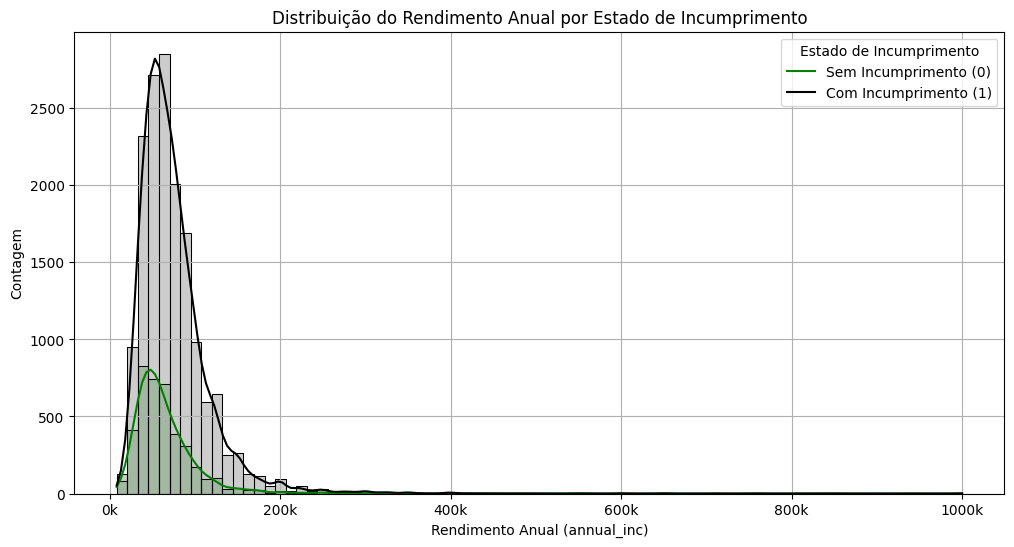

In [125]:
import matplotlib.ticker as ticker

# Criar um histograma da variável "annual_inc" segmentado por "bad_loan"
plt.figure(figsize=(12, 6))
sns.histplot(data, x="annual_inc", hue="bad_loan", bins=80, kde=True, alpha=0.2,palette={0: "black", 1: "green"})

# Personalizar o gráfico
plt.xlabel("Rendimento Anual (annual_inc)")
plt.ylabel("Contagem")
plt.title("Distribuição do Rendimento Anual por Estado de Incumprimento")
plt.legend(title="Estado de Incumprimento", labels=["Sem Incumprimento (0)", "Com Incumprimento (1)"])
plt.grid(True)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))

# Mostrar o gráfico
plt.show()

### EXERCISE 2.5 (Optional, but incentivized) Create an additional **insightful plot**. Describe the insight.  


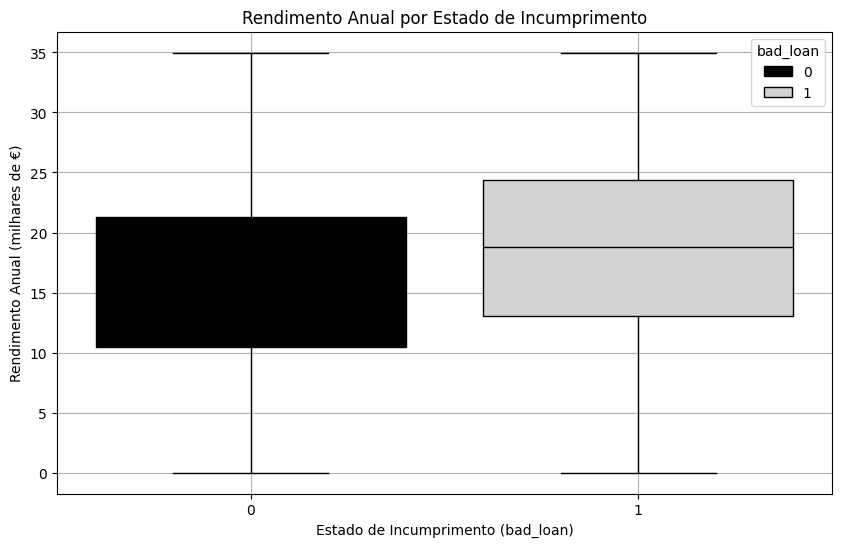

In [126]:

# Criar o boxplot novamente com a correção da paleta
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="bad_loan", y="dti", hue="bad_loan", palette=["black", "lightgray"])

# Personalizar o gráfico
plt.xlabel("Estado de Incumprimento (bad_loan)")
plt.ylabel("Rendimento Anual (milhares de €)")
plt.title("Rendimento Anual por Estado de Incumprimento")
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))  # Escala em milhares
plt.grid(True)

# Mostrar o gráfico
plt.show()


# Exercise 3

# Exercise 4

# Exercise 5

# Exercise 6

# Exercise 7

# Exercise 8

# Exercise 9